In [1]:
from sklearn.model_selection import KFold
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import function
import matplotlib.pyplot as plt
import math
import tqdm
import optuna

In [2]:
p_1=50
p_2=50
n=150
r_J_or=10
r_1_or=10
r_2_or=10
r_prop=1.0
w_J=5.0
w_1=5.0
w_2=5.0
X1_erro=0.001
X2_erro=0.001
y_erro=0.001

## データの生成

In [3]:
X_1_al,X_2_al,y_al=function.gene_data(p_1,p_2,n,r_J_or,r_1_or,r_2_or,r_prop,w_J,w_1,w_2,X1_erro,X2_erro,y_erro)

In [4]:
X_1_original=X_1_al[:,:100]
X_2_original=X_2_al[:,:100]
y_original=y_al[:,:100]

X_1_test=X_1_al[:,100:150]
X_2_test=X_2_al[:,100:150]
y_test=y_al[:,100:150]

In [5]:
df_tra=np.row_stack((X_1_original,X_2_original,y_original))
df_tes=np.row_stack((X_1_test,X_2_test,y_test))

## 本当にこのデータが正しいのか検証

In [6]:
from sklearn.linear_model import LinearRegression

In [10]:
X=np.row_stack((X_1_original,X_2_original))
XT=X.T
yT=y_original.T
reg = LinearRegression().fit(XT, yT)

In [11]:
erro=np.linalg.norm(yT-XT.dot(reg.coef_.T),ord=2)**2
erro

4.001531884294739

In [9]:
yT

array([[ 0.02742548],
       [-0.11885877],
       [-0.22538802],
       [-0.21922996],
       [-0.01818128],
       [ 0.02246357],
       [-0.1695751 ],
       [-0.18205876],
       [ 0.5670637 ],
       [-0.0223763 ],
       [ 0.25238466],
       [ 0.33608636],
       [ 0.1041207 ],
       [-0.02149303],
       [-0.29158995],
       [-0.08349342],
       [-0.10526078],
       [ 0.23297807],
       [ 0.90865901],
       [-0.24957089],
       [ 0.39878643],
       [ 0.17838625],
       [ 0.57593614],
       [ 0.1848684 ],
       [ 0.07292035],
       [-0.34089856],
       [ 0.1743694 ],
       [ 0.54890348],
       [ 0.60592369],
       [ 0.46011809],
       [ 0.5260432 ],
       [-0.30101301],
       [-0.0957159 ],
       [ 0.46170352],
       [-0.06439358],
       [-0.06236665],
       [-0.00855408],
       [ 0.40135766],
       [ 0.15480045],
       [-0.10689416],
       [ 0.26868964],
       [-0.02510604],
       [ 0.1764352 ],
       [ 0.47502237],
       [ 0.26510441],
       [-0

## W-sJIVE-decompositionを実装

### 分解

In [12]:
times=100
threshold=0.1
r_J=40
r_1=40
r_2=40


In [13]:
erro_lis,erro_best,S_J_best,U_1_best,U_2_best,S_1_best,W_1_best,S_2_best,W_2_best,sigma_J_best,sigma_1_best,sigma_2_best,hat_X_best=function.W_sJIVE_decompositon_1(
    times=times,r_J=r_J,r_1=r_1,r_2=r_2,X_1_or=X_1_original,X_2_or=X_2_original,threshold=threshold
)


  2%|▏         | 2/100 [00:00<00:11,  8.27it/s]


In [14]:
erro_lis

[542.335633598556,
 734.3650234078316,
 732.8798676125219,
 732.9328647890134,
 731.6802034937419,
 731.6523486452232,
 0.2250588036338157,
 172.05264009455684,
 172.0893196576964,
 172.0932345286444,
 172.15055511466915,
 172.15571633763167,
 0.06136600782151308]

In [15]:
X=np.row_stack((X_1_original,X_2_original))
X

array([[-0.32825973, -0.0631087 ,  0.05693121, ..., -0.72217542,
        -0.49452263, -0.29571805],
       [-0.28622085, -0.46860394, -0.31465867, ..., -0.35804618,
        -0.66092467, -0.47415471],
       [ 0.12263345,  0.42665822,  0.23139743, ..., -0.44622099,
         0.31470184, -0.21228065],
       ...,
       [ 0.01454667,  0.09700894, -0.53846956, ...,  0.05505535,
         0.34251858,  0.02781205],
       [-0.68786778, -0.48701115, -0.35744892, ..., -0.41553182,
        -0.67448169, -0.13369761],
       [ 0.51323851,  0.78735581,  0.08230545, ...,  0.41564213,
         0.37810733,  0.58158432]])

In [16]:
hat_X_best

array([[-0.313728  , -0.06289281,  0.04430193, ..., -0.71722394,
        -0.5045501 , -0.30874261],
       [-0.28911557, -0.46016771, -0.30466343, ..., -0.35811522,
        -0.67979151, -0.47113862],
       [ 0.11969201,  0.42484364,  0.24225236, ..., -0.44565558,
         0.30504985, -0.21605471],
       ...,
       [ 0.01044752,  0.09534956, -0.52610021, ...,  0.05846159,
         0.34178148,  0.01642754],
       [-0.68757852, -0.48099542, -0.3597403 , ..., -0.41744598,
        -0.67680787, -0.14431216],
       [ 0.52272821,  0.78251824,  0.07922493, ...,  0.41490624,
         0.38100638,  0.60196701]])

### 最小二乗法で解いてみる

In [17]:
#最小二乗法では解けるので自分のコードのミス
erro_y_lis=[]
theta_1=theta_1_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=theta_21_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=theta_22_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
for l in range(10):
    theta_1=(y_original-theta_21.dot(S_1_best)-theta_22.dot(S_2_best)).dot(S_J_best.T).dot(np.linalg.inv(S_J_best.dot(S_J_best.T)))
    theta_21=(y_original-theta_1.dot(S_J_best)-theta_22.dot(S_2_best)).dot(S_1_best.T).dot(np.linalg.inv(S_1_best.dot(S_1_best.T)))
    theta_22=(y_original-theta_1.dot(S_J_best)-theta_21.dot(S_1_best)).dot(S_2_best.T).dot(np.linalg.inv(S_2_best.dot(S_2_best.T)))
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

In [18]:
erro_y_lis

[0.00945278342141662,
 0.008359782728006004,
 0.008037756937011703,
 0.007898474365165926,
 0.00782460054215723,
 0.007780270645375347,
 0.007751298006659118,
 0.007731189649105545,
 0.00771664413347165,
 0.007705820904734467]

### 回帰係数のスパース推定

In [19]:
times=100
threshold=0.001
lam_J=0.01
lam_1=0.001
lam_2=0.001
gamma=0

In [26]:
sigma_1_best

array([0.15515929, 0.15022787, 0.1425997 , 0.13798356, 0.13266399,
       0.12886647, 0.12611453, 0.11708004, 0.11187668, 0.10980268,
       0.10691213, 0.10080708, 0.09929662, 0.09687161, 0.09431714,
       0.08939202, 0.086297  , 0.0852245 , 0.08035025, 0.07617258,
       0.07120547, 0.06967316, 0.06761682, 0.06407032, 0.06307782,
       0.05868516, 0.05557422, 0.05463956, 0.05323381, 0.04937532,
       0.04670986, 0.04635153, 0.03886011, 0.03787177, 0.03547398,
       0.03296097, 0.03034708, 0.02810683, 0.02554474, 0.02398696,
       0.02342574, 0.02049686, 0.01777261, 0.01687829, 0.01555545,
       0.01377174, 0.01067206, 0.00747171, 0.00615144, 0.00348145])

In [20]:
erro_y_lis,erro_best,theta_1_best,theta_21_best,theta_22_best,hat_y_best=function.W_sJIVE_decomposition_2(
    y_original,threshold,times,lam_J,lam_1,lam_2,gamma,S_J_best,S_1_best,S_2_best,sigma_J_best,sigma_1_best,sigma_2_best
)

100%|██████████| 100/100 [00:00<00:00, 576.10it/s]


In [21]:
erro_best

0.026507045498459406

In [22]:
erro_y_lis

[0.03798656843354785,
 0.026797660680956053,
 0.026396408082484873,
 0.027403506574525827,
 0.02617786931371594,
 0.025821056578438795,
 0.026726817020962138,
 0.026285957448215744,
 0.026341292856853802,
 0.02645993404129885,
 0.026366974718604465,
 0.02634712962034391,
 0.02638338431833107,
 0.026472122422171392,
 0.026480021185278126,
 0.026509463240953622,
 0.026506139418856177,
 0.02650542803927246,
 0.026506736195400796,
 0.026507014678741777,
 0.026508800210926782,
 0.02651274347863394,
 0.026508600846237594,
 0.026507968903191584,
 0.026505839888398018,
 0.026507443135425884,
 0.026507301669804157,
 0.026508611232146678,
 0.02650739512505152,
 0.026507071053286046,
 0.026506424755909006,
 0.026507031205821735,
 0.02650697114276182,
 0.02650727316347648,
 0.02650708063846203,
 0.026507018478558804,
 0.026506893318922402,
 0.026507027791838465,
 0.026507017032357597,
 0.026507073314548695,
 0.026507047855483263,
 0.026507041028446834,
 0.026507019383870355,
 0.026507042579110775,

In [23]:
y_original

array([[ 0.02742548, -0.11885877, -0.22538802, -0.21922996, -0.01818128,
         0.02246357, -0.1695751 , -0.18205876,  0.5670637 , -0.0223763 ,
         0.25238466,  0.33608636,  0.1041207 , -0.02149303, -0.29158995,
        -0.08349342, -0.10526078,  0.23297807,  0.90865901, -0.24957089,
         0.39878643,  0.17838625,  0.57593614,  0.1848684 ,  0.07292035,
        -0.34089856,  0.1743694 ,  0.54890348,  0.60592369,  0.46011809,
         0.5260432 , -0.30101301, -0.0957159 ,  0.46170352, -0.06439358,
        -0.06236665, -0.00855408,  0.40135766,  0.15480045, -0.10689416,
         0.26868964, -0.02510604,  0.1764352 ,  0.47502237,  0.26510441,
        -0.48351922,  0.02244181, -0.1241529 , -0.18563041,  0.42713826,
         0.00866614, -0.12617103,  0.27666653,  0.46381191, -0.25932068,
         0.23183926, -0.13869123,  0.89833223, -0.23088563,  0.25011805,
         0.06305346, -0.12639128, -0.00809987,  0.01850075,  0.13252925,
         0.40785802,  0.16187131, -0.00824959,  0.3

In [24]:
hat_y_best

array([ 2.28504779e-02, -1.21021021e-01, -2.13047166e-01, -2.24091042e-01,
       -1.40031542e-03,  4.21905236e-02, -1.64156016e-01, -1.80126992e-01,
        5.61256000e-01, -3.34684709e-02,  2.62197813e-01,  3.41941801e-01,
        8.99480664e-02, -1.61981931e-02, -3.05238588e-01, -9.30443518e-02,
       -1.07980833e-01,  2.28122429e-01,  8.95127089e-01, -2.29244705e-01,
        4.27486349e-01,  1.73779455e-01,  5.79026853e-01,  1.63973975e-01,
        8.73556520e-02, -3.42994802e-01,  1.59560996e-01,  5.61471060e-01,
        5.97195265e-01,  4.03963553e-01,  5.11566416e-01, -3.02467102e-01,
       -8.76527752e-02,  4.77082423e-01, -7.30900518e-02, -5.39360637e-02,
       -4.09908539e-02,  4.06234189e-01,  1.51256734e-01, -1.16758664e-01,
        2.64818831e-01, -2.27014826e-02,  1.77982746e-01,  4.76161292e-01,
        2.92402785e-01, -4.86419118e-01,  3.25055796e-02, -1.11853247e-01,
       -1.87634173e-01,  3.83419929e-01,  1.11215376e-02, -1.27913914e-01,
        2.67120219e-01,  

<function matplotlib.pyplot.show(close=None, block=None)>

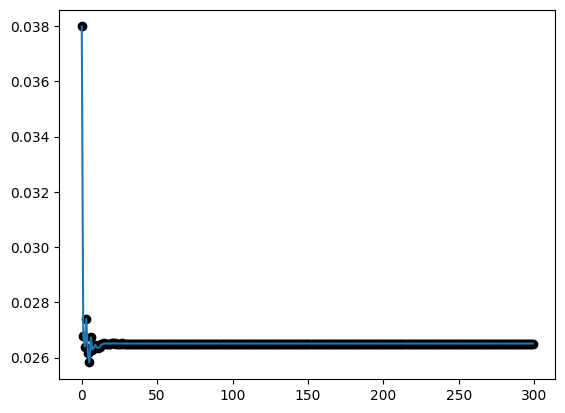

In [25]:
plt.plot(erro_y_lis)
plt.scatter(range(len(erro_y_lis)),erro_y_lis,color="black")
plt.show

### 非ゼロの係数のみを残す

In [26]:
theta_1_best

array([ 0.08039532, -0.03100526,  0.00182704, -0.06298138, -0.15527392,
        0.08992492,  0.10002758, -0.14933919,  0.02079624,  0.0169161 ,
       -0.08590838, -0.07312483, -0.05023824,  0.29835555, -0.13090565,
        0.05782476,  0.26608498, -0.09529091,  0.07624428, -0.14560131,
        0.31761064,  0.35035023,  0.31265015, -0.04148221, -0.13191669,
       -0.17727011,  0.24849901,  0.00998813,  0.12093115,  0.0779991 ,
        0.06291835, -0.83191694,  0.09155816,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [41]:
nonzero_theta_1 = np.nonzero(theta_1_best)[0]
theta_1_best_sparse=theta_1_best[nonzero_theta_1]
theta_1_best_sparse.shape

(33,)

In [28]:
U_1_best_sparse=U_1_best[:,nonzero_theta_1]
U_1_best_sparse.shape

(50, 33)

In [29]:
U_2_best_sparse=U_2_best[:,nonzero_theta_1]
U_2_best_sparse.shape

(50, 33)

In [30]:
S_J_best_sparse=S_J_best[nonzero_theta_1,:]
S_J_best_sparse.shape

(33, 100)

In [42]:
nonzero_theta_21 = np.nonzero(theta_21_best)[0]
theta_21_best_sparse=theta_21_best[nonzero_theta_21]
theta_21_best_sparse.shape

(13,)

In [32]:
W_1_best_sparse=W_1_best[:,nonzero_theta_21]
W_1_best_sparse.shape

(50, 13)

In [34]:
S_1_best_sparse=S_1_best[nonzero_theta_21,:]
S_1_best_sparse.shape

(13, 100)

In [43]:
nonzero_theta_22 = np.nonzero(theta_22_best)[0]
theta_22_best_sparse=theta_22_best[nonzero_theta_22]
theta_22_best_sparse.shape

(9,)

In [36]:
W_2_best_sparse=W_2_best[:,nonzero_theta_22]
W_2_best_sparse.shape

(50, 9)

In [37]:
S_2_best_sparse=S_2_best[nonzero_theta_22,:]
S_2_best_sparse.shape

(9, 100)

### パラメータチューニング用の予測を行う

In [44]:
erro_tes_lis,erro_tes_best,S_J_new_best,S_1_new_best,S_2_new_best,y_new,erro_result=function.sJIVE_prediction(
    X_1_tes=X_1_test,X_2_tes=X_2_test,y_tes=y_test,U_1_best=U_1_best_sparse,U_2_best=U_2_best_sparse,W_1_best=W_1_best_sparse,W_2_best=W_2_best_sparse,theta_1_best=theta_1_best_sparse,theta_21_best=theta_21_best_sparse,theta_22_best=theta_22_best_sparse,times_tes=100,threshold_tes=0.01
)

100%|██████████| 100/100 [00:00<00:00, 6880.98it/s]


In [45]:
erro_tes_lis

[3.3362253587213124,
 1.9346284462460344,
 0.985763725499966,
 0.5894164086712328,
 0.5151827496261272,
 0.46814270416891374,
 0.41943225430955966,
 0.4053581694174543,
 0.39678361852861554,
 0.3852758320889899,
 0.38150278739843857,
 0.3790744741434614,
 0.3755918713411194,
 0.37438663230049696,
 0.37357694230502353,
 0.3723854637624431,
 0.37196143688814437,
 0.3716694716210569,
 0.3712340129909356,
 0.3710767518644175,
 0.37096676074834456,
 0.3708015998429257,
 0.3707415358636261,
 0.3706989793634281,
 0.370634945264674,
 0.3706116032384228,
 0.37059485153064425,
 0.3705696771822522,
 0.3705605051497979,
 0.37055383370562334,
 0.37054384303509136,
 0.370540211321829,
 0.37053753249071847,
 0.3705335406886333,
 0.3705320945079319,
 0.37053101242391995,
 0.3705294093127166,
 0.3705288308490496,
 0.37052839179973474,
 0.3705277453897532,
 0.3705275131519722,
 0.37052733439944796,
 0.3705270728945673,
 0.37052697936258355,
 0.37052690638986363,
 0.37052680030604357,
 0.3705267625323312

## テスト広場

In [84]:
lam_J=1.0
lam_1=0.001
lam_2=0.001
gamma=0
#(j=0,1,...,r_J)

In [85]:
erro_y_lis=[]
theta_1=theta_1_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=theta_21_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=theta_22_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
for l in range(100):
    #pcLassoの対角行列を作成
    pcLasso_sigma_J=[]
    for i in range(len(sigma_J_best)):
        a_i=sigma_J_best[0]**2-sigma_J_best[i]**2
        pcLasso_sigma_J.append(a_i)
    diag_sigma_J_final=np.diag(pcLasso_sigma_J)
    diag_sigma_J_final_r_J=diag_sigma_J_final[:r_J,:r_J]

    pcLasso_sigma_1=[]
    for i in range(len(sigma_1_best)):
        a_i=sigma_1_best[0]**2-sigma_1_best[i]**2
        pcLasso_sigma_1.append(a_i)
    diag_sigma_1_final=np.diag(pcLasso_sigma_1)
    diag_sigma_1_final_r_1=diag_sigma_1_final[:r_1,:r_1]

    pcLasso_sigma_2=[]
    for i in range(len(sigma_2_best)):
        a_i=sigma_2_best[0]**2-sigma_2_best[i]**2
        pcLasso_sigma_2.append(a_i)
    diag_sigma_2_final=np.diag(pcLasso_sigma_2)
    diag_sigma_2_final_r_2=diag_sigma_2_final[:r_2,:r_2]

    #theta_1を更新
    for j in range(r_J):
        theta_1_del_j=np.delete(theta_1,j)
        S_J_best_del_j=np.delete(S_J_best,j,axis=0)
        S_J_best_j=S_J_best[j]
        z=(y_original-theta_21.dot(S_1_best)-theta_22.dot(S_2_best)-theta_1_del_j.dot(S_J_best_del_j)).dot(S_J_best_j.T)
        if z>lam_J:
            theta_1[j]=(z-lam_J)/(np.linalg.norm(S_J_best_j,ord=2)**2)
        elif np.absolute(z)<=lam_J:
            theta_1[j]=0
        else:
            theta_1[j]=(z+lam_J)/(np.linalg.norm(S_J_best_j,ord=2)**2)



    #誤差をとる
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

    #theta_21を更新
    for j in range(r_1):
        theta_21_del_j=np.delete(theta_21,j)
        S_1_best_del_j=np.delete(S_1_best,j,axis=0)
        S_1_best_j=S_1_best[j]
        z=(y_original-theta_1.dot(S_J_best)-theta_22.dot(S_2_best)-theta_21_del_j.dot(S_1_best_del_j)).dot(S_1_best_j.T)
        if z>lam_1:
            theta_21[j]=(z-lam_1)/(np.linalg.norm(S_1_best_j,ord=2)**2+gamma*diag_sigma_1_final_r_1[j,j])
        elif np.absolute(z)<=lam_1:
            theta_21[j]=0
        else:
            theta_21[j]=(z+lam_1)/(np.linalg.norm(S_1_best_j,ord=2)**2+gamma*diag_sigma_1_final_r_1[j,j])

    #誤差をとる
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

    #theta_22を更新
    for j in range(r_2):
        theta_22_del_j=np.delete(theta_22,j)
        S_2_best_del_j=np.delete(S_2_best,j,axis=0)
        S_2_best_j=S_2_best[j]
        z=(y_original-theta_1.dot(S_J_best)-theta_21.dot(S_1_best)-theta_22_del_j.dot(S_2_best_del_j)).dot(S_2_best_j.T)
        if z>lam_2:
            theta_22[j]=-(z-lam_2)/(np.linalg.norm(S_2_best_j,ord=2)**2+gamma*diag_sigma_2_final_r_2[j,j])
        elif np.absolute(z)<=lam_2:
            theta_22[j]=0
        else:
            theta_22[j]=(z+lam_2)/(np.linalg.norm(S_2_best_j,ord=2)**2+gamma*diag_sigma_2_final_r_2[j,j])

    #誤差をとる
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

In [86]:
erro_y_lis

[1.180689302434097,
 1.1500635705903877,
 1.150444071476731,
 1.1522481627171597,
 1.1492425939879125,
 1.1489214406890114,
 1.149152605207301,
 1.1490227408597071,
 1.1490426073381153,
 1.149619933914947,
 1.1495868394722397,
 1.1495694507133962,
 1.1498381888011233,
 1.1500171183434653,
 1.150024711792463,
 1.150027937563656,
 1.150093173896041,
 1.150047208097193,
 1.1500725599135557,
 1.1500956137551002,
 1.1501133472575187,
 1.1501433684653937,
 1.1501196553126094,
 1.1501048950592745,
 1.1501309708720757,
 1.1501244087986604,
 1.1501194100959842,
 1.150107057559982,
 1.150110394458781,
 1.150110685090219,
 1.1501339921019011,
 1.1501289226434919,
 1.150118121043688,
 1.150089781489033,
 1.1501015353793735,
 1.150102810020176,
 1.1501299829272098,
 1.1501284926108353,
 1.1501185747542602,
 1.150090371969414,
 1.1500994721501285,
 1.1501014932560387,
 1.1501246791831656,
 1.1501245565200138,
 1.1501170689298932,
 1.150095555096449,
 1.1501019821672949,
 1.1501037925932533,
 1.15012

<function matplotlib.pyplot.show(close=None, block=None)>

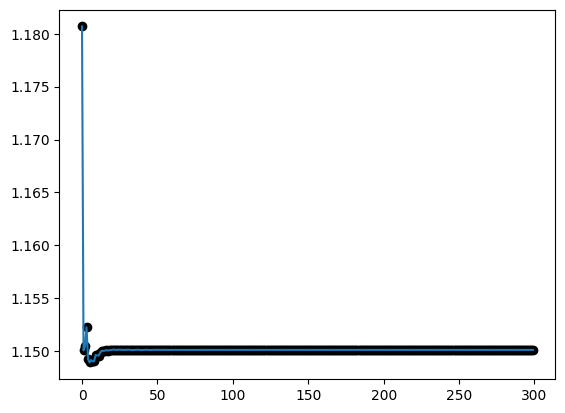

In [87]:
plt.plot(erro_y_lis)
plt.scatter(range(len(erro_y_lis)),erro_y_lis,color="black")
plt.show

In [88]:
theta_1

array([ 0.05123244,  0.21120311, -0.03056201,  0.        , -0.0825378 ,
       -0.00996745, -0.11545755,  0.00231046,  0.16151542, -0.20438591,
        0.17587973,  0.01330369,  0.        , -0.05405301,  0.07145153,
        0.04051003,  0.        ,  0.        , -0.13833197,  0.        ,
        0.        ,  0.        ,  0.14603287,  0.        ,  0.        ,
        0.        ,  0.        , -0.03281539,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [89]:
theta_21

array([ 0.        ,  0.11131884,  0.        ,  0.31693071,  0.        ,
        0.29120397,  0.        ,  0.12867229,  0.52926681,  0.0218962 ,
        0.        ,  0.08793252, -0.29574765,  0.        , -0.20577262,
        0.10414683,  0.23922591, -0.25982112,  0.        ,  0.        ,
       -0.26305251,  0.        ,  0.15634289,  0.        ,  0.14958489,
        0.        ,  0.        ,  0.14843874, -0.28434528, -0.13296656,
       -0.35570612,  0.        , -0.19926241,  0.        ,  0.        ,
        0.08975083, -0.29224076,  0.        ,  0.        , -0.0154694 ])

In [90]:
theta_22

array([ 0.00000000e+00, -2.91925175e-12,  0.00000000e+00, -2.00539501e-12,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.02303997e-02, -5.09256503e-12,
        0.00000000e+00, -8.86264230e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.51538168e-12,  0.00000000e+00, -6.21063398e-02, -1.56509578e-12,
       -2.38409923e-04, -4.19130340e-02, -5.95110542e-04,  0.00000000e+00,
       -1.51358670e-04,  0.00000000e+00,  0.00000000e+00, -2.77157845e-12,
       -1.13029871e-03,  0.00000000e+00,  0.00000000e+00, -1.30745106e-12])

<function matplotlib.pyplot.show(close=None, block=None)>

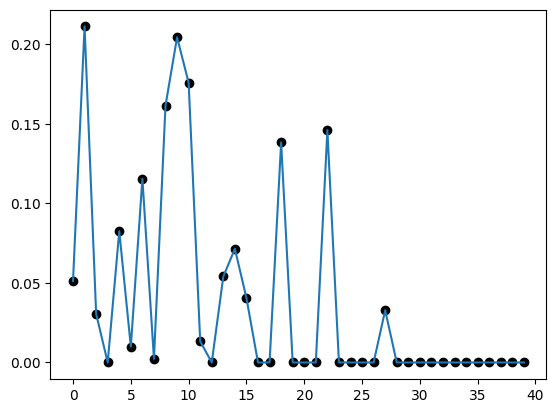

In [91]:
plt.plot(np.absolute(theta_1))
plt.scatter(range(len(theta_1)),np.absolute(theta_1),color="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

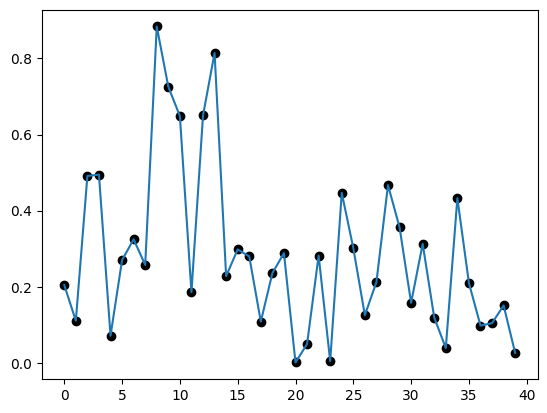

In [62]:
plt.plot(np.absolute(theta_21))
plt.scatter(range(len(theta_21)),np.absolute(theta_21),color="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

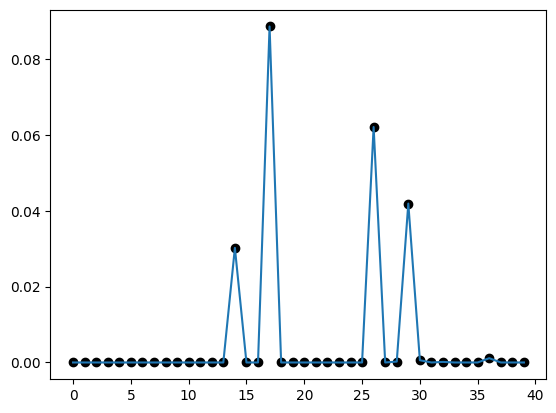

In [93]:
plt.plot(np.absolute(theta_22))
plt.scatter(range(len(theta_22)),np.absolute(theta_22),color="black")
plt.show

In [ ]:
theta_1_del_j=np.delete(theta_1,j)
S_J_best_del_j=np.delete(S_J_best,j,axis=0)
S_J_best_j=S_J_best[j]

In [42]:
S_J_best

array([[ 2.72888248e+00,  3.31787949e+00,  2.46493542e+00, ...,
         2.45960637e+00,  2.88358910e+00,  2.04330008e+00],
       [-4.08221182e-01,  1.89048705e+00, -6.68969952e-01, ...,
        -3.64775919e-01,  1.01346155e+00, -2.46112373e-01],
       [-2.64411253e-01,  5.98335664e-02, -6.14434190e-01, ...,
        -2.24623455e-01,  1.43356130e-01,  1.79692324e-01],
       ...,
       [-1.10637652e-02,  3.10750482e-02, -4.03260996e-03, ...,
         5.33046856e-03, -9.12227569e-03, -2.20904068e-02],
       [-3.67050318e-02, -2.58426797e-03, -2.32908202e-03, ...,
         2.63756270e-02, -2.17371867e-02, -3.23724277e-02],
       [-7.41970466e-04,  1.08945909e-02,  1.95582739e-02, ...,
        -1.35940669e-02, -9.26236613e-03, -4.74493719e-03]])

In [46]:
S_J_best_j=S_J_best[0]
S_J_best_j.shape

(100,)

In [49]:
np.linalg.norm(S_J_best_j,ord=2)**2

642.4561179275595

In [50]:
S_J_best_j.dot(S_J_best_j.T)

642.4561179275595

In [41]:
for j in range(r_J):
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [48]:
(y_original-theta_21.dot(S_1_best)-theta_22.dot(S_2_best)-theta_1_del_j.dot(S_J_best_del_j)).dot(S_J_best_j)

array([5.62063886e-08])

In [32]:
pcLasso_sigma_J=[]
for i in range(len(sigma_J_best)):
    a_i=sigma_J_best[0]**2-sigma_J_best[i]**2
    pcLasso_sigma_J.append(a_i)
diag_sigma_J_final=np.diag(pcLasso_sigma_J)
diag_sigma_J_final_r_J=diag_sigma_J_final[:r_J,:r_J]

In [33]:
diag_sigma_J_final[1]

array([  0.        , 438.12865427,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [29]:
k = 5
kf = KFold(n_splits=k)
lis_cv_best=[]
for train_idex,test_idx in kf.split(df_tra.T):
    train_data=df_tra[:,train_idex]
    test_data=df_tra[:,test_idx]
    
    X_1_or=train_data[:p_1,:]
    X_2_or=train_data[p_1:p_1+p_2,:]
    y_or=train_data[p_1+p_2:,:]

    erro_lis,erro_best,S_J_best,U_1_best,U_2_best,S_1_best,W_1_best,S_2_best,W_2_best,sigma_J_best,sigma_1_best,sigma_2_best,hat_X_best=function.W_sJIVE_decompositon_1(
        times=times,r_J=r_J,r_1=r_1,r_2=r_2,X_1_or=X_1_or,X_2_or=X_2_or,threshold=threshold
        )
    erro_y_lis,erro_best,theta_1_best,theta_21_best,theta_22_best,hat_y_best=function.W_sJIVE_decomposition_2(
        y_original=y_or,threshold=threshold,times=times,lam_J=lam_J,lam_1=lam_1,lam_2=lam_2,gamma=gamma,S_J_best=S_J_best,S_1_best=S_1_best,S_2_best=S_2_best,sigma_J_best=sigma_J_best,sigma_1_best=sigma_1_best,sigma_2_best=sigma_2_best
        )
    
    nonzero_theta_1 = np.nonzero(theta_1_best)[0]
    theta_1_best_sparse=theta_1_best[nonzero_theta_1]

    U_1_best_sparse=U_1_best[:,nonzero_theta_1]
    U_2_best_sparse=U_2_best[:,nonzero_theta_1]
    S_J_best_sparse=S_J_best[nonzero_theta_1,:]

    nonzero_theta_21 = np.nonzero(theta_21_best)[0]
    theta_21_best_sparse=theta_21_best[nonzero_theta_21]
    W_1_best_sparse=W_1_best[:,nonzero_theta_21]
    S_1_best_sparse=S_1_best[nonzero_theta_21,:]

    nonzero_theta_22 = np.nonzero(theta_22_best)[0]
    theta_22_best_sparse=theta_22_best[nonzero_theta_22]
    W_2_best_sparse=W_2_best[:,nonzero_theta_22]
    S_2_best_sparse=S_2_best[nonzero_theta_22,:]


    X_1_tes=test_data[:p_1,:]
    X_2_tes=test_data[p_1:p_1+p_2,:]
    y_tes=test_data[p_1+p_2:,:]
    
    erro_tes_lis,erro_tes_best,S_J_new_best,S_1_new_best,S_2_new_best,y_new,erro_result=function.sJIVE_prediction(
        X_1_tes=X_1_tes,X_2_tes=X_2_tes,y_tes=y_tes,U_1_best=U_1_best_sparse,U_2_best=U_2_best_sparse,W_1_best=W_1_best_sparse,W_2_best=W_2_best_sparse,theta_1_best=theta_1_best_sparse,theta_21_best=theta_21_best_sparse,theta_22_best=theta_22_best_sparse,times_tes=100,threshold_tes=0.001
    )
    lis_cv_best.append(erro_tes_best)

100%|██████████| 100/100 [00:00<00:00, 10530.78it/s]


In [30]:
lis_cv_best

[0.23028655856638552,
 2.297212643733626,
 0.17923024558139528,
 0.21965857565984204,
 0.1942184079988002]

In [34]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# 対角成分だけを残した対角行列
D = np.diag(np.diag(A))
D

array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])